# Holocene volcano types and volcanic features in South America

Import data from: http://volcano.si.edu/list_volcano_holocene.cfm

Save the downloaded file as a csv-file.

Use TextWrangler's Find function to replace commas (,) with periods (.).

#### First import modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import additional modules:**

*Import **Basemap** in order to plot onto a map. First open a new Terminal window, and type: conda install Basemap. After installation you can import it.*

*Import **colors** for scatter plots and colorbar.*

*Import **cm** for cmap.*

*Import **plt.rcParams['figure.figsize']** to assign figure size.*

*Import **inset_axes** for positioning a background box for the legend.*

*Import **Rectangle** for making a background box for the legend.*

In [2]:
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib import cm
plt.rcParams['figure.figsize'] = [6,12]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

#### Set path to data:

In [3]:
fp = "/Users/Nellimetiainen/Desktop//a1.csv"

#### Set dataframe:

In [4]:
dataFrame = pd.read_csv(fp, sep=';', skiprows=1, encoding='latin 1')

#### New columns with separate values for volcano type and volcanic features:

In [5]:
dataFrame['Strato'] = dataFrame['South America primary volcano type'].loc[(dataFrame['South America primary volcano type'] == 1)]
dataFrame['Shield'] = dataFrame['South America primary volcano type'].loc[(dataFrame['South America primary volcano type'] == 2)]
dataFrame['Lava dome'] = dataFrame['South America primary volcano type'].loc[(dataFrame['South America primary volcano type'] == 3)]
dataFrame['Complex'] = dataFrame['South America primary volcano type'].loc[(dataFrame['South America primary volcano type'] == 4)]
dataFrame['Caldera'] = dataFrame['South America primary volcano type'].loc[(dataFrame['South America primary volcano type'] == 5)]
dataFrame['Compound'] = dataFrame['South America primary volcano type'].loc[(dataFrame['South America primary volcano type'] == 6)]
dataFrame['Pyroclastic cone'] = dataFrame['South America primary volcano type'].loc[(dataFrame['South America primary volcano type'] == 7)]
dataFrame['Volcanic field'] = dataFrame['South America primary volcano type'].loc[(dataFrame['South America primary volcano type'] == 8)]
dataFrame['Pyroclastic shield'] = dataFrame['South America primary volcano type'].loc[(dataFrame['South America primary volcano type'] == 9)]
dataFrame['Maar'] = dataFrame['South America primary volcano type'].loc[(dataFrame['South America primary volcano type'] == 10)]
dataFrame['Subglacial'] = dataFrame['South America primary volcano type'].loc[(dataFrame['South America primary volcano type'] == 11)]

#### Select wanted columns and set new dataframe:

In [6]:
select_cols = ['Volcano Number','Volcano Name','Country','South America primary volcano type','Primary Volcano Type','Activity Evidence','Last Known Eruption', 'Latitude','Longitude','Elevation (m)','SA rock type','Dominant Rock Type','Tectonic Setting','Strato','Shield','Lava dome','Complex','Caldera','Compound','Pyroclastic cone','Volcanic field','Pyroclastic shield','Maar','Subglacial']
selected_data = dataFrame[select_cols]

#### Select data by coordinates
Select wanted data for South American volcanoes by determining coordinates: (Make sure to use select_lat instead of dataFrame for determining longitude.)

In [7]:
select_lat = dataFrame.loc[(dataFrame['Latitude'] <= 7.995) & (dataFrame['Latitude'] >= -55.361)]
select_lon = select_lat.loc[(select_lat['Longitude'] <= -60.175) & (select_lat['Longitude'] >= -84.982)]
print(select_lon)

      Volcano Number              Volcano Name  \
1128          344140              Azul. Volcan   
1133          345033                    Arenal   
1134          345034                  Platanar   
1135          345040                      Poas   
1136          345050                     Barva   
1137          345060                     Irazu   
1139          346010                      Baru   
1140          346030                 Valle. El   
1141          351011                   Romeral   
1142          351012              Bravo. Cerro   
1143          351020          Ruiz. Nevado del   
1144          351021              Santa Isabel   
1145          351030        Tolima. Nevado del   
1146          351040                    Machin   
1147          351050         Huila. Nevado del   
1148          351060                    Purace   
1149          351061                    Sotara   
1150          351062                   Petacas   
1151          351070                Dona Juana   


# All volcano types and features scatter map 

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


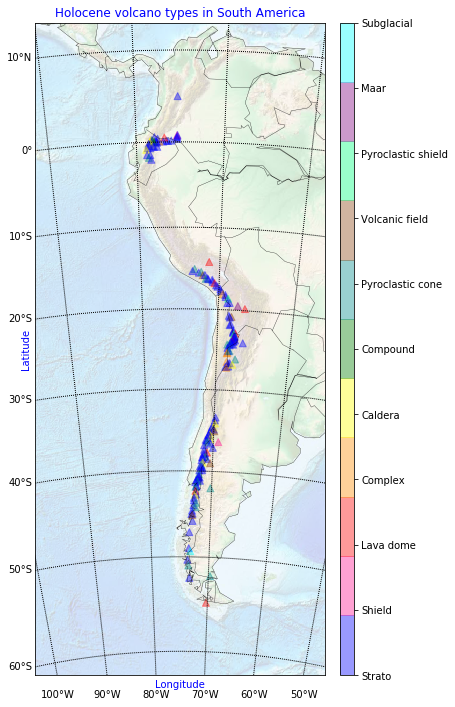

In [23]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
m.drawcoastlines(linewidth=0.3)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.20)
#m.arcgisimage(service='World_Physical_Map')

# Set custom colors for colorbar:
cmap = mpl.colors.ListedColormap(['b','deeppink','red','darkorange','yellow','g','darkcyan','saddlebrown','springgreen','purple','cyan'])

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["South America primary volcano type"], cmap=cmap, alpha=0.4)

# Set grid for parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene volcano types in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Colorbar settings:
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(1, 11, 12)
# Set min and max values with clim:
plt.clim(1, 11)
# Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = m.colorbar(cmap=cmap, alpha=0.4, ticks=[11, 10, 8, 3, 7, 9, 2, 5, 6, 4, 1], boundaries=bounds, location='right', pad="5%")
cbar.ax.set_yticklabels(['Subglacial', 'Maar', 'Volcanic field', 'Lava dome', 'Pyroclastic cone', 'Pyroclastic shield', 'Shield', 'Caldera','Compound', 'Complex', 'Strato'])
# Colorbar title:
#cbar.set_label('Volcano type', color='blue')

# Display plot:
#plt.show()

# Save figure as picture:
plotFile = str('volcanotype1') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

# Volcano types and features scatter map and bars side by side

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


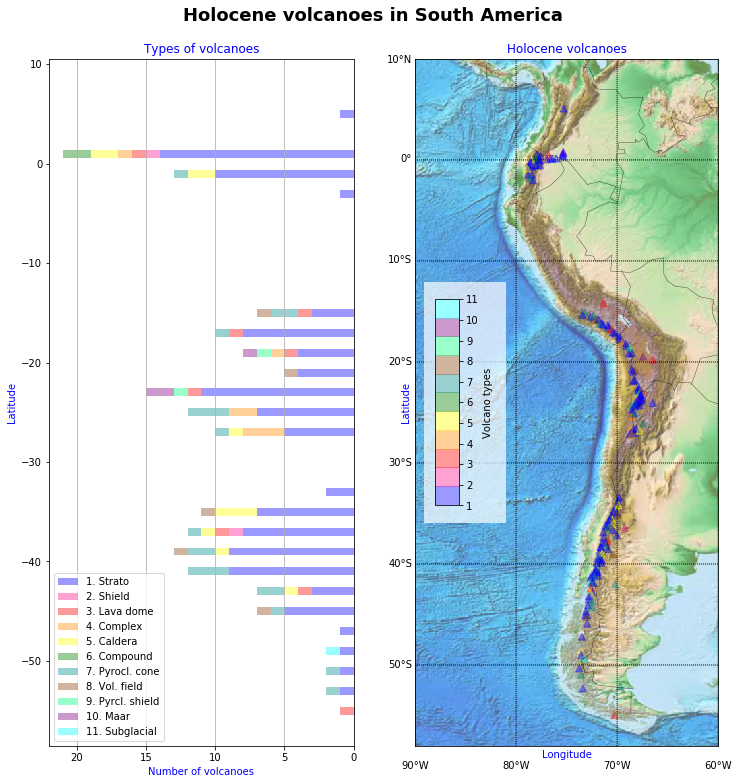

In [22]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

## Set up for bar plot:
# Make a bar every 2 degrees latitude:
barIncrement = 2
barBins= np.arange(8, -56, -barIncrement)
# Determine the length of bars:
numBars = len(barBins)
# Separate different depth earthquakes:
stratoCount = np.zeros(numBars)
shieldCount = np.zeros(numBars)
lavaCount = np.zeros(numBars)
complexCount = np.zeros(numBars)
calderaCount = np.zeros(numBars)
compoundCount = np.zeros(numBars)
pyroconeCount = np.zeros(numBars)
volfieldCount = np.zeros(numBars)
pyroshieldCount = np.zeros(numBars)
maarCount = np.zeros(numBars)
subglaCount = np.zeros(numBars)

# Set up figure for subplots:
f, ax = plt.subplots(nrows=1, ncols=2)

# Title for whole figure:
plt.suptitle('Holocene volcanoes in South America', fontsize= 18, fontweight='bold')

# Make bar plot (set axis, load values):
for i in range(numBars):
            numStrato = select_lon['Strato'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            stratoCount[i] = stratoCount[i] + numStrato
            
            numShield = select_lon['Shield'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            shieldCount[i] = shieldCount[i] + numShield
            
            numLava = select_lon['Lava dome'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            lavaCount[i] = lavaCount[i] + numLava
            
            numComplex = select_lon['Complex'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            complexCount[i] = complexCount[i] + numComplex
            
            numCaldera = select_lon['Caldera'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            calderaCount[i] = calderaCount[i] + numCaldera
            
            numCompound = select_lon['Compound'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            compoundCount[i] = compoundCount[i] + numCompound
            
            numPyrocone = select_lon['Pyroclastic cone'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            pyroconeCount[i] = pyroconeCount[i] + numPyrocone
            
            numVolfield = select_lon['Volcanic field'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            volfieldCount[i] = volfieldCount[i] + numVolfield
            
            numPyroshield = select_lon['Pyroclastic shield'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            pyroshieldCount[i] = pyroshieldCount[i] + numPyroshield
            
            numMaar = select_lon['Maar'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            maarCount[i] = maarCount[i] + numMaar
            
            numSubgla = select_lon['Subglacial'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            subglaCount[i] = subglaCount[i] + numSubgla
            
# Plot bars:
ax[0].barh(y=barBins-(barIncrement/2), width=stratoCount, label='1. Strato', color='b', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=shieldCount, left=stratoCount, label='2. Shield', color='deeppink', alpha = 0.4) 
ax[0].barh(y=barBins-(barIncrement/2), width=lavaCount, left=stratoCount+shieldCount, label='3. Lava dome', color='red', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=complexCount, left=stratoCount+shieldCount+lavaCount, label='4. Complex', color='darkorange', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=calderaCount, left=stratoCount+shieldCount+lavaCount+complexCount, label='5. Caldera', color='yellow', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=compoundCount, left=stratoCount+shieldCount+lavaCount+complexCount+calderaCount, label='6. Compound', color='g', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=pyroconeCount, left=stratoCount+shieldCount+lavaCount+complexCount+calderaCount+compoundCount, label='7. Pyrocl. cone', color='darkcyan', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=volfieldCount, left=stratoCount+shieldCount+lavaCount+complexCount+calderaCount+compoundCount+pyroconeCount, label='8. Vol. field', color='saddlebrown', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=pyroshieldCount, left=stratoCount+shieldCount+lavaCount+complexCount+calderaCount+compoundCount+pyroconeCount+volfieldCount, label='9. Pyrcl. shield', color='springgreen', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=maarCount, left=stratoCount+shieldCount+lavaCount+complexCount+calderaCount+compoundCount+pyroconeCount+volfieldCount+pyroshieldCount, label='10. Maar', color='purple', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=subglaCount, left=stratoCount+shieldCount+lavaCount+complexCount+calderaCount+compoundCount+pyroconeCount+volfieldCount+pyroshieldCount+maarCount, label='11. Subglacial', color='cyan', alpha = 0.4)    
        
# Set limits:
totalCount = stratoCount + shieldCount + lavaCount + complexCount + calderaCount + compoundCount + pyroconeCount + volfieldCount + pyroshieldCount + maarCount + subglaCount
ax[0].set_xlim(totalCount.max()+1, 0)
ax[0].set_xticks(np.arange(0,25,5))

# Add grid:
ax[0].grid(axis='x')

# Add titles:
ax[0].set_title('Types of volcanoes', color='blue')
ax[0].set_xlabel('Number of volcanoes', color='blue')
ax[0].set_ylabel('Latitude', color='blue')

# Add legend:
ax[0].legend(fontsize='medium', loc = 3)

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Determine colors for colormap:
cmap = mpl.colors.ListedColormap(['b','deeppink','red','darkorange','yellow','g','darkcyan','saddlebrown','springgreen','purple','cyan'])

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["South America primary volcano type"], cmap=cmap, alpha=0.4)

# Set grid and parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene volcanoes', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Colorbar settings:
bounds = np.linspace(1, 11, 12)
# Set min and max values with clim:
plt.clim(1, 11)
# Make a white box background for the colorbar (determine height and width, location and padding at edges:
# Assign spines and ticks, choose color:
cbbox = inset_axes(ax[1], '27%', '35%', loc = 6, borderpad=0.9)
[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
cbbox.set_facecolor([1,1,1,0.7])
# Set axins:
axins1 = inset_axes(ax[1], width="8%", height="30%", loc=6, borderpad=2)
# Create colorbar:
cbar = plt.colorbar(cax=axins1, boundaries=bounds, ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], cmap=cmap, orientation="vertical")
# Colorbar title:
cbar.set_label('Volcano types')    

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots:   
plt.subplots_adjust(top=0.92)
    
# Save figure as picture:
plotFile = str('South America primary volcano type') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

# Just volcanoes Holocene scatter map and bar plot

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


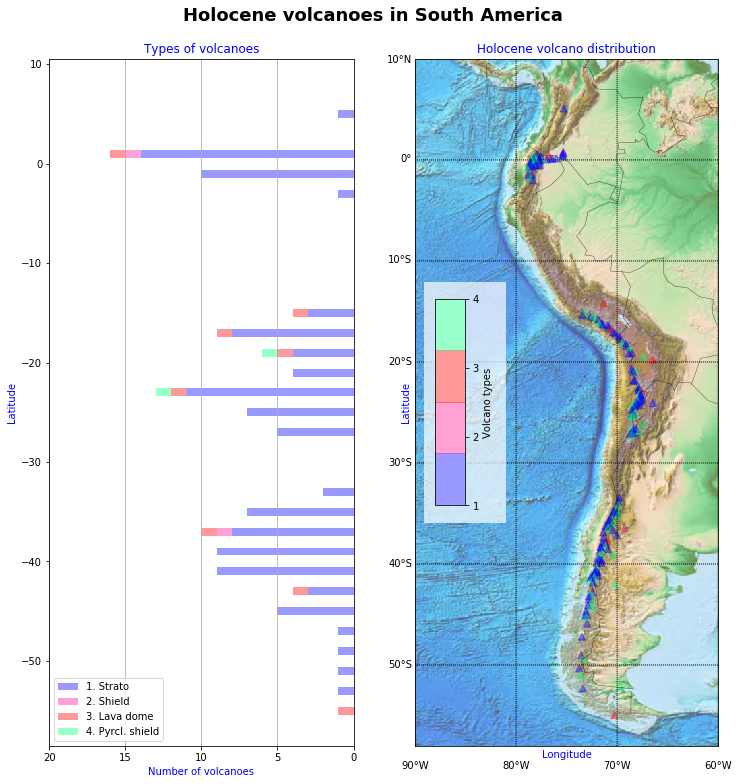

In [26]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

## Set up for bar plot:
# Make a bar every 2 degrees latitude:
barIncrement = 2
barBins= np.arange(8, -56, -barIncrement)
# Determine the length of bars:
numBars = len(barBins)
# Separate different depth earthquakes:
stratoCount = np.zeros(numBars)
shieldCount = np.zeros(numBars)
lavaCount = np.zeros(numBars)
pyroshieldCount = np.zeros(numBars)

# Set up figure for subplots:
f, ax = plt.subplots(nrows=1, ncols=2)

# Title for whole figure:
plt.suptitle('Holocene volcanoes in South America', fontsize=18, fontweight='bold')

# Make bar plot (set axis, load values):
for i in range(numBars):
            numStrato = select_lon['Strato'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            stratoCount[i] = stratoCount[i] + numStrato
            
            numShield = select_lon['Shield'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            shieldCount[i] = shieldCount[i] + numShield
            
            numLava = select_lon['Lava dome'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            lavaCount[i] = lavaCount[i] + numLava
                
            numPyroshield = select_lon['Pyroclastic shield'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            pyroshieldCount[i] = pyroshieldCount[i] + numPyroshield
            
# Plot bars:
ax[0].barh(y=barBins-(barIncrement/2), width=stratoCount, label='1. Strato', color='blue', alpha=0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=shieldCount, left=stratoCount, label='2. Shield', color='deeppink', alpha=0.4) 
ax[0].barh(y=barBins-(barIncrement/2), width=lavaCount, left=stratoCount+shieldCount, label='3. Lava dome', color='red', alpha=0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=pyroshieldCount, left=stratoCount+shieldCount+lavaCount, label='4. Pyrcl. shield', color='springgreen', alpha=0.4)    
        
# Set limits:
totalCount = stratoCount + shieldCount + lavaCount + pyroshieldCount
ax[0].set_xlim(totalCount.max()+1, 0)
ax[0].set_xticks(np.arange(0,25,5))

# Add grid:
ax[0].grid(axis='x')

# Add titles:
ax[0].set_title('Types of volcanoes', color='blue')
ax[0].set_xlabel('Number of volcanoes', color='blue')
ax[0].set_ylabel('Latitude', color='blue')

# Add legend:
ax[0].legend(fontsize='medium', loc = 3)

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Determine colors for colormap:
cmap = mpl.colors.ListedColormap(['blue','deeppink','red', 'springgreen'])

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["South America primary volcano type"], cmap=cmap, alpha=0.4)

# Set grid and parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene volcano distribution', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(1, 4, 5)
# Set min and max values with clim:
plt.clim(1, 4)
cbbox = inset_axes(ax[1], '27%', '35%', loc = 6, borderpad=0.9)
[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
cbbox.set_facecolor([1,1,1,0.7])
axins1 = inset_axes(ax[1], width="10%", height="30%", loc=6, borderpad=2)
cbar = plt.colorbar(cax=axins1, cmap=cmap, alpha=0.4, ticks=[1, 2, 3, 4], orientation="vertical", boundaries=bounds)
#cbar.ax.set_yticklabels(['Strato', 'Shield', 'Lava dome', 'Pyroclastic shield'])

# Colorbar title:
cbar.set_label('Volcano types')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots:   
plt.subplots_adjust(top=0.92)
    
# Save figure as picture:
plotFile = str('South America primary volcano type new') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

# Volcano types and volcanic features viewed separately

## Strato volcanoes scatter map

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


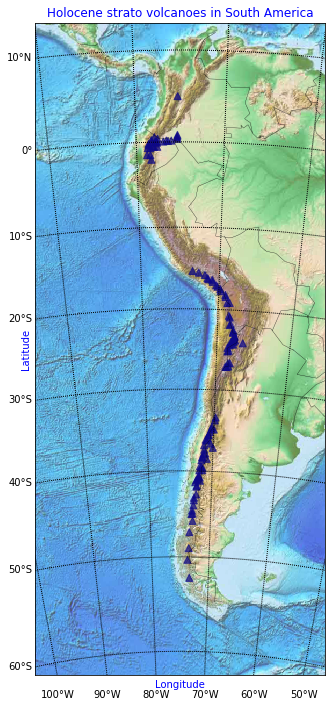

In [11]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["Strato"], cmap='plasma', alpha=0.7)

# Set grid for parallels and meridians:     
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('Holocene strato volcanoes in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
#cmap = cm.get_cmap('Reds', 1)

# Save figure as picture:
plotFile = str('strato') + ".png"
plt.savefig(savepath+plotFile)

# Display image:
plt.show()

## Shield volcanoes

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["Shield"], cmap='plasma', alpha=0.7)

# Set grid for parallels and meridians:     
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('Holocene shield volcanoes in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 1)

# Save figure as picture:
plotFile = str('shield') + ".png"
plt.savefig(savepath+plotFile)

# Display image:
plt.show()

## Lava domes

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["Lava dome"], cmap='plasma', alpha=0.7)

# Set grid for parallels and meridians:     
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('Holocene lava domes in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 1)

# Save figure as picture:
plotFile = str('lavadome') + ".png"
plt.savefig(savepath+plotFile)

# Display image:
plt.show()

## Complexes

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["Complex"], cmap='plasma', alpha=0.7)

# Set grid for parallels and meridians:     
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('Holocene complexes in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 1)

# Save figure as picture:
plotFile = str('complex') + ".png"
plt.savefig(savepath+plotFile)

# Display image:
plt.show()

## Calderas

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["Caldera"], cmap='plasma', alpha=0.7)

# Set grid for parallels and meridians:     
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('Holocene calderas in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 1)

# Save figure as picture:
plotFile = str('caldera') + ".png"
plt.savefig(savepath+plotFile)

# Display image:
plt.show()

## Compounds

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["Compound"], cmap='plasma', alpha=0.7)

# Set grid for parallels and meridians:     
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('Holocene compounds in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 1)

# Save figure as picture:
plotFile = str('compound') + ".png"
plt.savefig(savepath+plotFile)

# Display image:
plt.show()

## Pyroclastic cones

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["Pyroclastic cone"], cmap='plasma', alpha=0.7)

# Set grid for parallels and meridians:     
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('Holocene pyroclastic cones in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 1)

# Save figure as picture:
plotFile = str('pyroclastic cone') + ".png"
plt.savefig(savepath+plotFile)

# Display image:
plt.show()

## Volcanic fields

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["Volcanic field"], cmap='plasma', alpha=0.7)

# Set grid for parallels and meridians:     
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('Holocene volcanic fields in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 1)

# Save figure as picture:
plotFile = str('volcanic field') + ".png"
plt.savefig(savepath+plotFile)

# Display image:
plt.show()

## Pyroclastic shields

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["Pyroclastic shield"], cmap='plasma', alpha=0.7)

# Set grid for parallels and meridians:     
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('Holocene pyroclastic shields in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 1)

# Save figure as picture:
plotFile = str('pyroclastic shield') + ".png"
plt.savefig(savepath+plotFile)

# Display image:
plt.show()

## Maars

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["Maar"], cmap='plasma', alpha=0.7)

# Set grid for parallels and meridians:     
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('Holocene maars in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 1)

# Save figure as picture:
plotFile = str('maar') + ".png"
plt.savefig(savepath+plotFile)

# Display image:
plt.show()

## Subglacial volcanoes

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, marker="^", s=50, c=select_lon["Subglacial"], cmap='plasma', alpha=0.7)

# Set grid for parallels and meridians:     
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('Holocene subglacial volcanoes in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 1)

# Save figure as picture:
plotFile = str('subglacial') + ".png"
plt.savefig(savepath+plotFile)

# Display image:
plt.show()